# Import

In [1]:
%matplotlib inline
import requests
from lxml import html
from datetime import datetime as dt
import numpy as np
from matplotlib import pyplot as plt

In [2]:
res = requests.get("http://www.koeri.boun.edu.tr/scripts/lst9.asp")
tx = html.fromstring(res.content).xpath("//pre/text()")[0]
lines = tx.splitlines()[7:]  # get rid of the headers

# take out timestamps and convert them to "hours since first event"
timestamps = [dt.strptime(l[:19], "%Y.%m.%d %H:%M:%S") for l in lines if "EGE DENIZI" in l]
t = np.array([(x - timestamps[-1]).total_seconds() / 3600 for x in timestamps])[::-1]

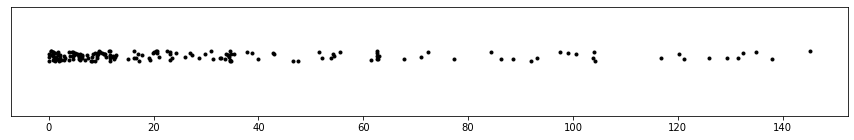

In [3]:
plt.figure(figsize=(15,2))
plt.ylim([-5, 5])
plt.yticks([])
_ = plt.plot(t, np.random.rand(len(t)), 'k.')

In [7]:
!pip install --upgrade pip setuptools wheel

  Using cached setuptools-65.3.0-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 52.0.0.post20210125
    Uninstalling setuptools-52.0.0.post20210125:
      Successfully uninstalled setuptools-52.0.0.post20210125


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [1]:
pip install hawkeslib

  Using cached hawkeslib-0.2.2.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for hawkeslib
Failed to build hawkeslib
  Running setup.py install for hawkeslib: started
  Running setup.py install for hawkeslib: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [40 lines of output]
  C:\Users\marco\anaconda3\lib\site-packages\setuptools\config\setupcfg.py:508: SetuptoolsDeprecationWarning: The license_file parameter is deprecated, use license_files instead.
    warnings.warn(msg, warning_class)
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-38
  creating build\lib.win-amd64-cpython-38\hawkeslib
  copying hawkeslib\__init__.py -> build\lib.win-amd64-cpython-38\hawkeslib
  creating build\lib.win-amd64-cpython-38\hawkeslib\model
  copying hawkeslib\model\model.py -> build\lib.win-amd64-cpython-38\hawkeslib\model
  copying hawkeslib\model\mv_exp.py -> build\lib.win-amd64-cpython-38\hawkeslib\model
  copying hawkeslib\model\poisson.py -> build\lib.win-amd64-cpython-38\hawkeslib\model
  copying hawkeslib\model\uv_bayes.py -> build\lib.win-amd64-cpython-38\hawkeslib\mod

In [4]:
%%time
from hawkeslib import UnivariateExpHawkesProcess as UVHP

ModuleNotFoundError: No module named 'hawkeslib'

In [7]:
uv = UVHP()
uv.fit(t)
print uv.get_params()

SyntaxError: invalid syntax (<unknown>, line 5)

In [8]:
(0.04930555306217892, 0.30548369162341404, 5.150339498582191)
CPU times: user 1.48 ms, sys: 0 ns, total: 1.48 ms
Wall time: 1.44 ms

SyntaxError: invalid syntax (<ipython-input-8-5a1e1d3c7a0f>, line 2)

In [ ]:
nr_shocks_sample = [len(uv.sample(24)) for x in range(100000)]
_ = plt.hist(nr_shocks_sample, bins=20)

In [ ]:
from hawkeslib import BayesianUVExpHawkesProcess as BUVHP

buv = BUVHP(mu_hyp=(1., 10.), alpha_hyp=(1., 1.), theta_hyp=(1., 10.))
trace = buv.sample_posterior(t, T=t[-1], n_samp=50000)

In [ ]:
# compute the BCIs
print pm.stats.quantiles(trace["alpha"], [2.5, 97.5])
print pm.stats.quantiles(trace["theta"], [2.5, 97.5])